In [1]:
%load_ext autoreload
%autoreload 2
# imports

import pacsltk.pacs_util as pacs_util
import pandas as pd
import numpy as np
from tqdm.auto import tqdm

pacs_util.prepare_matplotlib_cycler()

# To avoid type 3 fonts: http://phyletica.org/matplotlib-fonts/
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import parse_util

import os
import glob
from datetime import timedelta

import pacsltk
print(pacsltk.__version__)

0.2.0


In [2]:
# Config paths
# EXP_CONFIG_NAME_DEFAULT = 'bench1_sleep_rand2_1000_200'
EXP_CONFIG_NAME_DEFAULT = 'autoscale_go_500_10k_5_rps'
exp_config_name = os.getenv("EXP_CONFIG_NAME", EXP_CONFIG_NAME_DEFAULT)
exp_file = f"configs/{exp_config_name}.json"
overview_file_glob = f"results/{exp_config_name}/overview*.csv"
overview_file = glob.glob(overview_file_glob)[0]

print('config name:', exp_config_name)
print('overview file:', overview_file)
print('experiment file:', exp_file)

config name: autoscale_go_500_10k_5_rps
overview file: results/autoscale_go_500_10k_5_rps/overview_res-2021-03-10_16-44-02.csv
experiment file: configs/autoscale_go_500_10k_5_rps.json


In [3]:
# get overview
overview_df = pd.read_csv(overview_file, index_col=0, parse_dates=True)
overview_df.head(8)

,target,rps,res_name,request_func,workload_name,is_rps,exp_time_mins
0,1,1,res-2021-03-08_17-20-05,autoscale_go_500_10k_5_rps,autoscale-go,True,60
1,1,2,res-2021-03-08_18-20-50,autoscale_go_500_10k_5_rps,autoscale-go,True,60
2,1,3,res-2021-03-08_19-21-25,autoscale_go_500_10k_5_rps,autoscale-go,True,60
3,1,5,res-2021-03-08_20-21-50,autoscale_go_500_10k_5_rps,autoscale-go,True,60
4,1,7,res-2021-03-08_21-22-12,autoscale_go_500_10k_5_rps,autoscale-go,True,60
5,1,10,res-2021-03-08_22-22-30,autoscale_go_500_10k_5_rps,autoscale-go,True,60
6,1,15,res-2021-03-08_23-22-47,autoscale_go_500_10k_5_rps,autoscale-go,True,60
7,1,20,res-2021-03-09_00-23-04,autoscale_go_500_10k_5_rps,autoscale-go,True,60


In [4]:
res_name = overview_df[(overview_df['target'] == 1) & (overview_df['rps'] == 20)]['res_name'].iloc[0]
res_logger_file = f"results/{exp_config_name}/{res_name}_logger.csv"
res_logger_file

'results/autoscale_go_500_10k_5_rps/res-2021-03-09_00-23-04_logger.csv'

In [5]:
res_reqs_file = f"results/{exp_config_name}/{res_name}_reqs.csv"
res_reqs_file

'results/autoscale_go_500_10k_5_rps/res-2021-03-09_00-23-04_reqs.csv'

,ready_count,total_conc,conc_window_average,time,rps,target,lambda_over_n,current_cc
time_dt,,,,,,,,
2021-03-08 23:23:00.324380,18,14,0.367845,1.615264e+09,20,1,1.111111,0.777778
2021-03-08 23:23:02.331438,18,7,0.376575,1.615264e+09,20,1,1.111111,0.388889
2021-03-08 23:23:04.335751,18,5,0.384380,1.615264e+09,20,1,1.111111,0.277778
2021-03-08 23:23:06.339943,18,10,0.385835,1.615264e+09,20,1,1.111111,0.555556
2021-03-08 23:23:08.344966,18,10,0.389141,1.615264e+09,20,1,1.111111,0.555556


<AxesSubplot:xlabel='time_dt'>

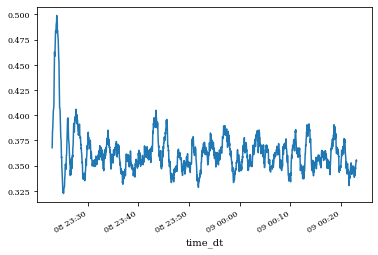

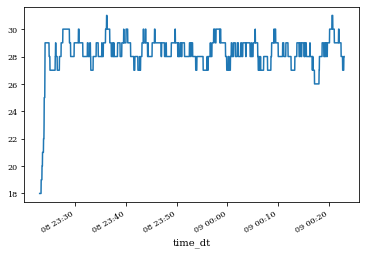

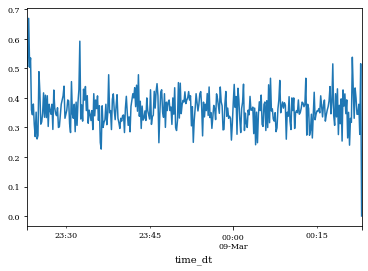

In [6]:
df = parse_util.parse_logger_file(res_logger_file)
display(df.head())

plt.figure()
df['conc_window_average'].plot()
plt.figure()
df['ready_count'].plot()
plt.figure()
df['current_cc'].resample('10s').mean().plot()

In [7]:
df_req = parse_util.parse_reqs_file(res_reqs_file)
df_req.head()

,client_start_time,client_end_time,client_elapsed_time,start_conc,end_conc,success,start_ready_count,end_ready_count,rps,target,client_end_time_dt,lambda_over_n
client_start_time_dt,,,,,,,,,,,,
2021-03-08 23:22:58.413745,1.615264e+09,1.615264e+09,0.515800,2,9,True,18,18,20,1,2021-03-08 23:22:58.929544,1.111111
2021-03-08 23:22:58.458963,1.615264e+09,1.615264e+09,0.513132,3,8,True,18,18,20,1,2021-03-08 23:22:58.972095,1.111111
2021-03-08 23:22:58.478375,1.615264e+09,1.615264e+09,0.510622,4,8,True,18,18,20,1,2021-03-08 23:22:58.988997,1.111111
2021-03-08 23:22:58.486733,1.615264e+09,1.615264e+09,0.514372,5,7,True,18,18,20,1,2021-03-08 23:22:59.001105,1.111111
2021-03-08 23:22:58.528887,1.615264e+09,1.615264e+09,0.515654,6,8,True,18,18,20,1,2021-03-08 23:22:59.044541,1.111111


In [8]:
# plt_column = 'conc_window_average'
plt_column = 'ready_count'
# plt_column = 'current_cc'

batch_seconds_vals = np.arange(1,300,2)

def get_batch_change_results(batch_seconds_vals, plt_column, df):
    batch_change_results = []
    for batch_seconds in (batch_seconds_vals):
        start_date = df[plt_column].index.min()
        stop_date = df[plt_column].index.max()
        range_start_dates = pd.date_range(start_date, stop_date,freq=f'{batch_seconds}S')
        range_end_dates = range_start_dates.shift()[:-1]
        range_start_dates = range_start_dates[:-1]

        val_means = []
        for idx in range(len(range_start_dates)):
            vals = df.loc[(df.index < range_end_dates[idx]) & (df.index > range_start_dates[idx]), 'conc_window_average']
            val_mean = vals.mean()
            val_means.append(val_mean)

        val_means_var = np.var(val_means)
        batch_change_results.append({
            'batch_size': batch_seconds,
            'mean_var': val_means_var,
        })
    batch_res_df = pd.DataFrame(data=batch_change_results)
    return batch_res_df

batch_res_df = get_batch_change_results(batch_seconds_vals, plt_column, df)

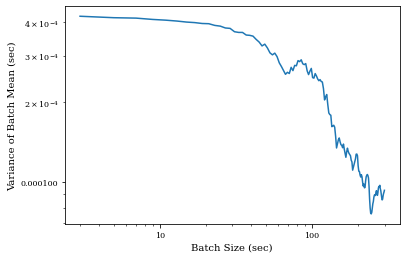

In [9]:
plt.loglog(batch_res_df['batch_size'], batch_res_df['mean_var'])
plt.xlabel('Batch Size (sec)')
plt.ylabel('Variance of Batch Mean (sec)')

parse_util.fix_log_x_plot()
parse_util.fix_log_y_plot()

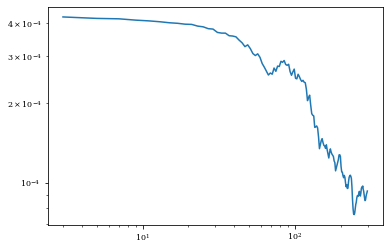

In [10]:
def get_plot_for_res_name(res_name):
    res_logger_file = f"results/{exp_config_name}/{res_name}_logger.csv"
    df = parse_util.parse_logger_file(res_logger_file)
    batch_res_df = get_batch_change_results(batch_seconds_vals, plt_column, df)
    return batch_res_df['batch_size'], batch_res_df['mean_var']

xs, ys = get_plot_for_res_name(res_name)
plt.loglog(xs,ys)

# Calculate Values and Their Variances

In [11]:
batch_seconds = 300

# func used on each batch (part of a single experiment logs)
parse_cols_funcs = {
    'conc_window_average': lambda df: df['conc_window_average'].mean(),
    'average_ready_count': lambda df: df['ready_count'].mean(),
}

parse_util.parse_batch_custom_funcs(df, batch_seconds, parse_cols_funcs)

{'conc_window_average_mean': 0.35990322739008307,
 'conc_window_average_var': 1.6360048728199213e-05,
 'conc_window_average_se': 0.0012195397316647864,
 'conc_window_average_ci': 0.007927721185451094,
 'average_ready_count_mean': 28.42947325605044,
 'average_ready_count_var': 0.08838735577600555,
 'average_ready_count_se': 0.08963935609683421,
 'average_ready_count_ci': 0.5827082168196214}

In [12]:
batch_seconds = 300

# func used on each batch (part of a single experiment logs)
parse_req_cols_funcs = {
    'client_elapsed_time': lambda df: df['client_elapsed_time'].mean(),
    'lambda_over_n': lambda df: df['lambda_over_n'].mean(),
}

parse_util.parse_batch_custom_funcs(df_req, batch_seconds, parse_req_cols_funcs)

{'client_elapsed_time_mean': 0.5157517146500493,
 'client_elapsed_time_var': 7.849869555029249e-07,
 'client_elapsed_time_se': 0.0002671375123419882,
 'client_elapsed_time_ci': 0.001736549995899927,
 'lambda_over_n_mean': 0.7040914309592913,
 'lambda_over_n_var': 5.443020754642011e-05,
 'lambda_over_n_se': 0.0022244551436336477,
 'lambda_over_n_ci': 0.014460258825841517}

# Plot Target Values for All vs Batch Size

In [13]:
all_res = {}
for res_name in tqdm(overview_df['res_name']):
    xs, ys = get_plot_for_res_name(res_name)
    all_res[res_name] = {
        'xs': xs,
        'ys': ys,
    }

  0%|          | 0/48 [00:00<?, ?it/s]

In [14]:
df

,ready_count,total_conc,conc_window_average,time,rps,target,lambda_over_n,current_cc
time_dt,,,,,,,,
2021-03-08 23:23:00.324380,18,14,0.367845,1.615264e+09,20,1,1.111111,0.777778
2021-03-08 23:23:02.331438,18,7,0.376575,1.615264e+09,20,1,1.111111,0.388889
2021-03-08 23:23:04.335751,18,5,0.384380,1.615264e+09,20,1,1.111111,0.277778
2021-03-08 23:23:06.339943,18,10,0.385835,1.615264e+09,20,1,1.111111,0.555556
2021-03-08 23:23:08.344966,18,10,0.389141,1.615264e+09,20,1,1.111111,0.555556
...,...,...,...,...,...,...,...,...
2021-03-09 00:22:53.903065,27,16,0.351863,1.615267e+09,20,1,0.740741,0.592593
2021-03-09 00:22:55.903467,27,16,0.353821,1.615267e+09,20,1,0.740741,0.592593
2021-03-09 00:22:57.905538,27,10,0.354056,1.615267e+09,20,1,0.740741,0.370370


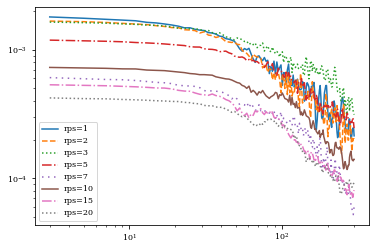

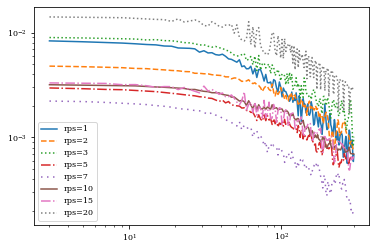

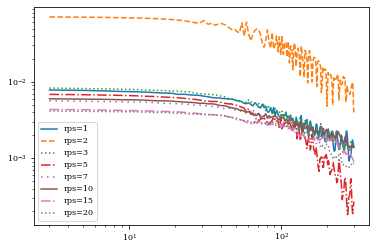

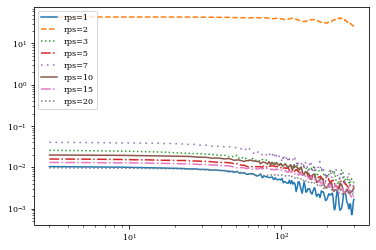

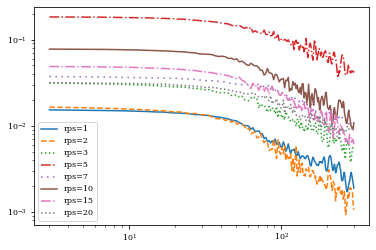

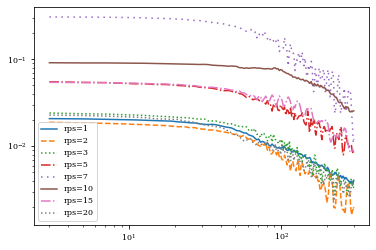

In [15]:
for target_value in overview_df['target'].unique():
    plt.figure()
    sub_df = overview_df.loc[overview_df['target'] == target_value, :]
    for rps in sub_df['rps']:
        res_name = sub_df.loc[sub_df['rps'] == rps]['res_name'].iloc[0]
        xs = all_res[res_name]['xs']
        ys = all_res[res_name]['ys']
        plt.loglog(xs, ys, label=f"rps={rps}")
    plt.legend()